<a href="https://colab.research.google.com/github/ArnoldoOliva/DatosMasivos/blob/main/C1_paralelismo_Partes_1_y_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import multiprocessing as mp
import numpy as np
import dask
from dask import delayed
import dask.array as da
import pandas as pd
pd.set_option("display.max_columns",None)
path="C:/Users/HUGO/Desktop/Maestria en CIENCIA DE DATOS UANL/DatosMasivos/"

# Practica 1: Paralelizacion.

Parte 1: Investigar sobre las lazy variables y como se usa el Delay para problemas mas grandes.

Parte 2: Generen varias funciones y construyan un grafo de paralelización con al menos 4 cuellos de botella.


Extra challenge: Buscar ensemble learning en Scikit learn, utilizar minimo 3 algoritmos de machine learning para crear un modelo paralelo basado en un ensamble. Generar uno con dask y otro con la libreria de ensemble de sklearn, y comparar resultados. 

## Parte 1:
**Lazy variables y como se usa el Delay para problemas mas grandes**

Las lazy variables (también conocidas como variables perezosas o lazy properties) son variables en programación que se calculan o inicializan solo cuando se acceden por primera vez, en lugar de hacerlo de manera inmediata al crear el objeto que las contiene.

En otros términos, una variable perezosa es una propiedad que no se calcula hasta que se solicita, lo que puede ser útil cuando se trabaja con objetos complejos o costosos de crear. En lugar de crear todos los componentes de un objeto en el momento de su creación, se retrasa la creación de algunos de ellos hasta que realmente se necesiten, lo que puede mejorar el rendimiento y la eficiencia del programa.

El uso de variables perezosas puede ser especialmente beneficioso en lenguajes de programación que son interpretados o tienen un alto costo de inicialización, ya que permite diferir el costo de la inicialización hasta que sea realmente necesario.

**Delay:**

En algunos casos, puede ser beneficioso retrasar la inicialización de una variable aún más, especialmente en problemas más grandes que requieren más tiempo de cómputo o memoria.

Una forma de retrasar aún más la inicialización es utilizando la función Delay en lugar de una variable perezosa convencional. La función Delay es una técnica de programación que permite posponer la evaluación de una expresión hasta que se solicite su resultado.

Por ejemplo, supongamos que se tiene una función que realiza un cálculo costoso o tardado, pero que este cálculo solo se necesita en ciertas situaciones. En lugar de calcular el resultado de la función de inmediato, se puede utilizar la función Delay para posponer la evaluación hasta que sea necesaria. De esta forma, se puede ahorrar tiempo y memoria en el procesamiento de la aplicación.

## Parte 2:
**Generen varias funciones y construyan un grafo de paralelización con al menos 4 cuellos de botella.**

In [ ]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time
import random


In [ ]:
lista=[random.randint(0, 9) for _ in range(10)]
def suma(x):
    return x + random.randint(0, 9)

def add(x,y):
    return x + y

def resta(x,y):
    return x - y

def multiply_add(x,y):
    return(x*y)



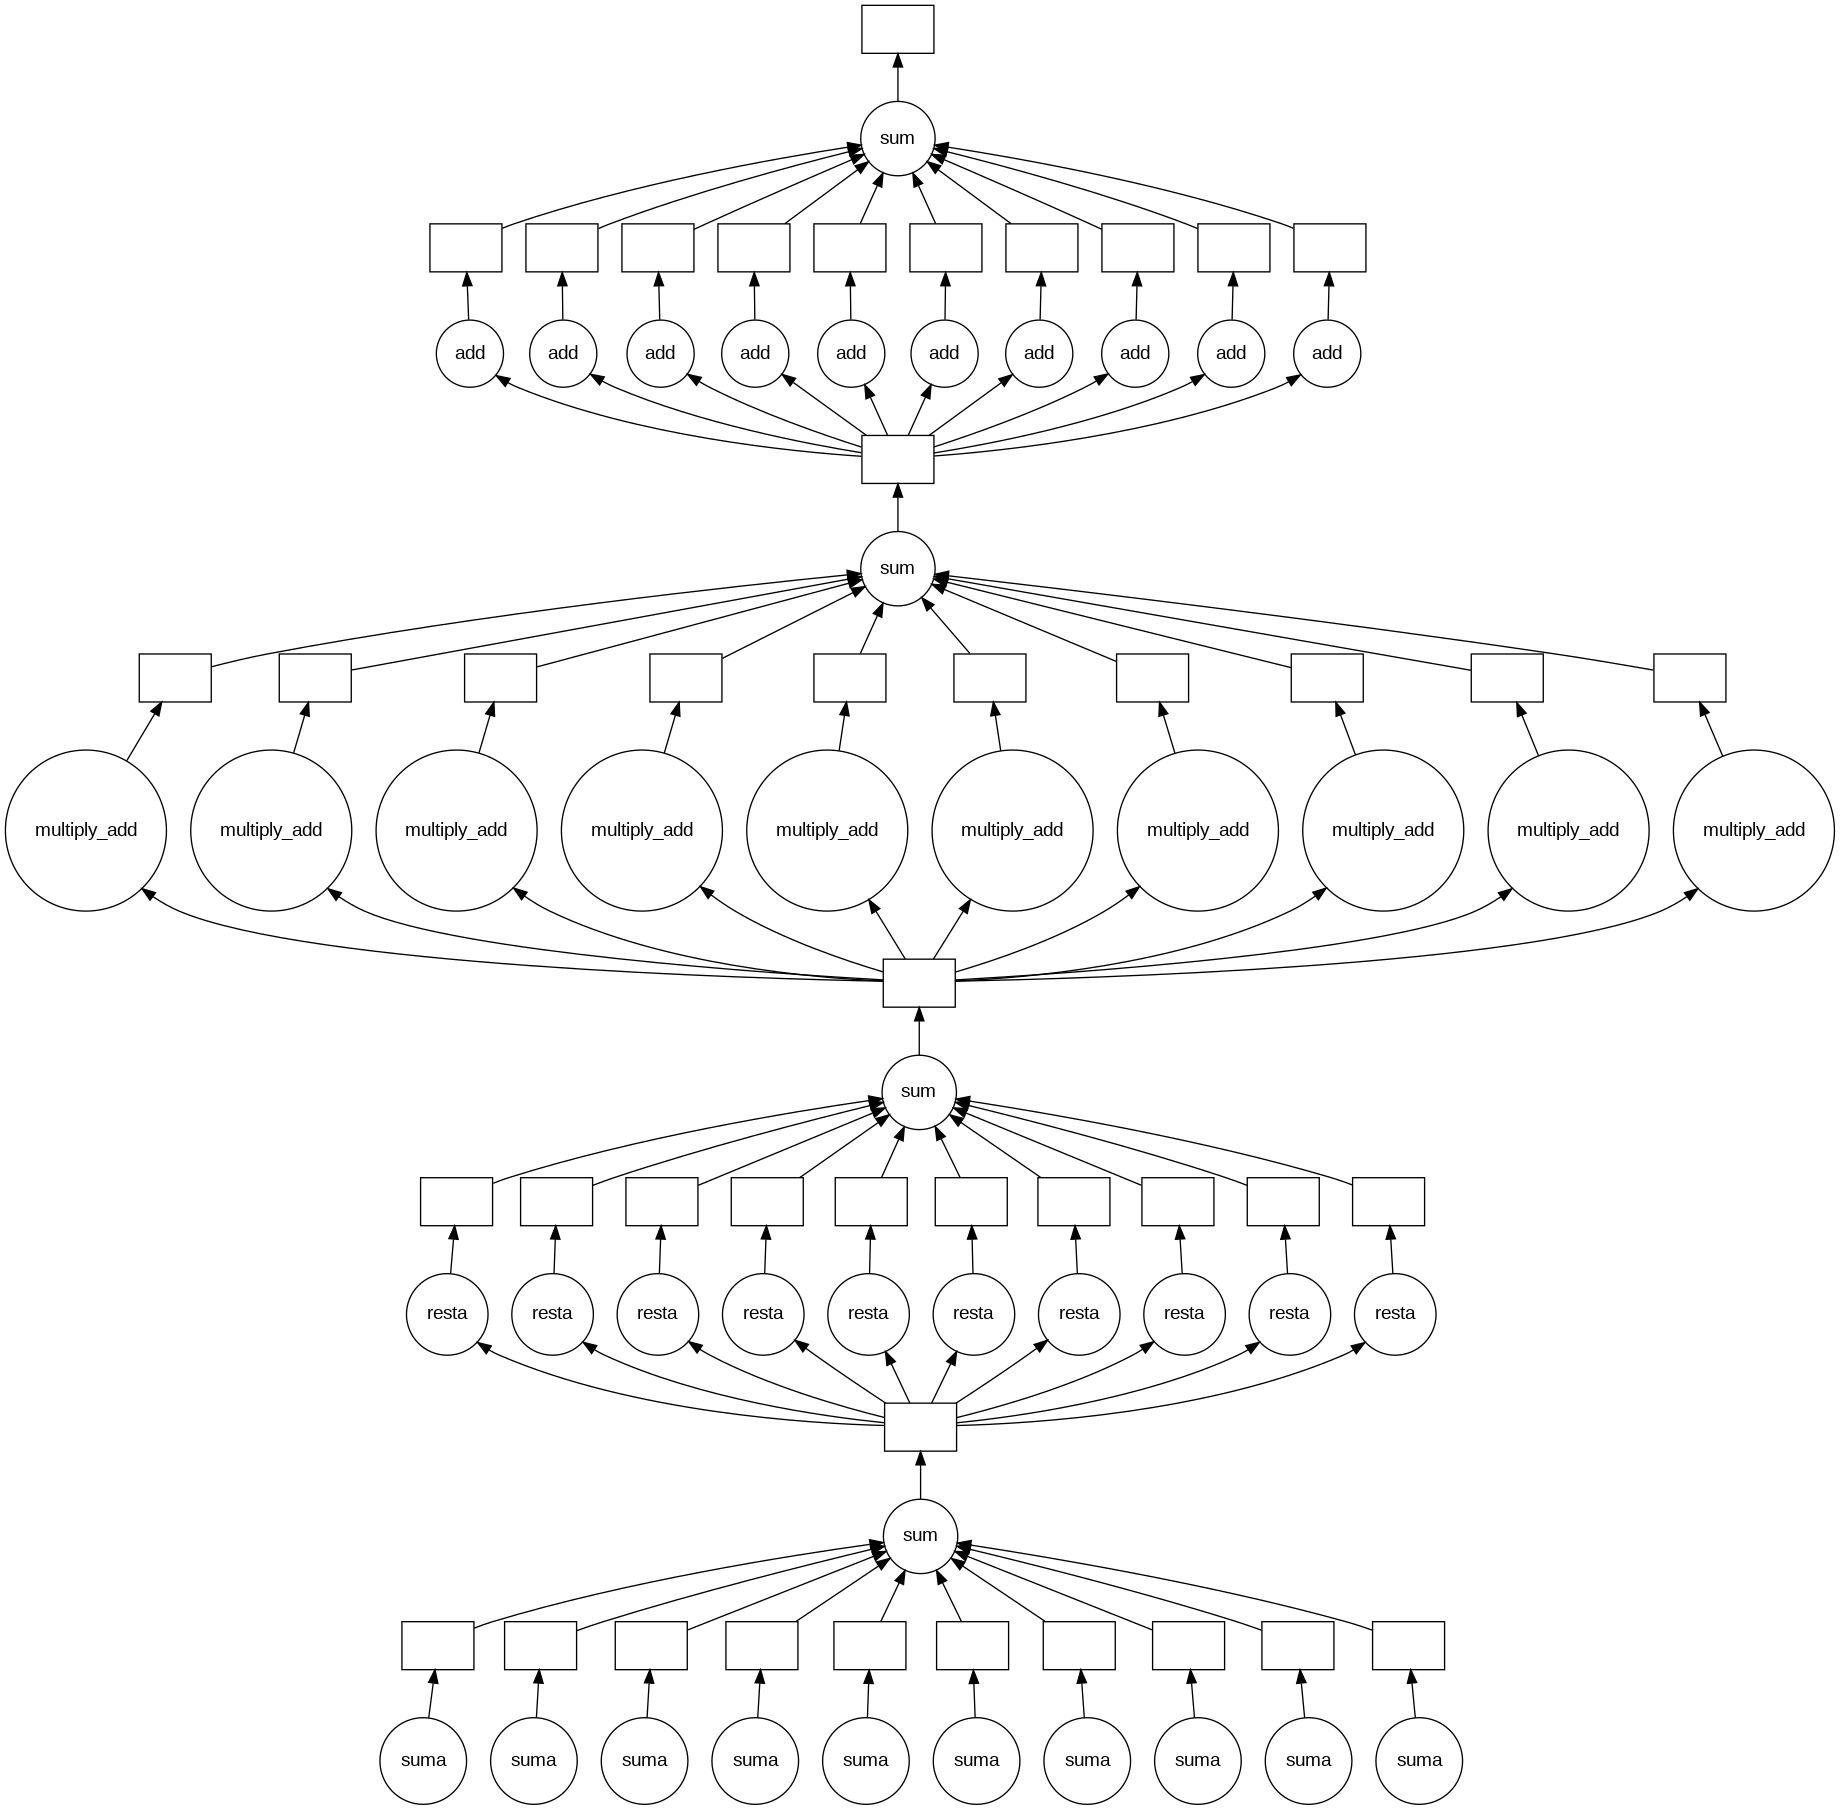

In [ ]:
#Capa 1 -cuello 1
step1 = [delayed(suma)(i) for i in lista]
tot1 = delayed(sum)(step1)
#Capa 2- cuello 2
step2 = [delayed(resta)(i, tot1) for i in lista]
tot2 = delayed(sum)(step2)
#Capa 3 - cuello 3
step3 = [delayed(multiply_add)(i, tot2) for i in lista]
tot3 = delayed(sum)(step3)
#Capa 4 -cuello 4
step4 = [delayed(add)(i,tot3) for i in lista]
tot4 = delayed(sum)(step4)
tot4.visualize()

In [ ]:
tot4.compute()

-243215

**Extra challenge**: Buscar ensemble learning en Scikit learn, utilizar minimo 3 algoritmos de machine learning para crear un modelo paralelo basado en un ensamble. Generar uno con dask y otro con la libreria de ensemble de sklearn, y comparar resultados. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
loans=pd.read_csv("/content/drive/MyDrive/loansmodified1.csv")
loans

FileNotFoundError: ignored